In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

In [2]:
# Import the dataset
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', parse_dates=['Created Date', 'Closed Date'])

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# View the dataset shape
df.shape

(300698, 53)

In [4]:
def prepareData(df):
    df['Request_Closing_Time'] = ((df['Closed Date'] - df['Created Date']).dt.seconds/60)/60
    df_clean=df[df['Request_Closing_Time'].notnull()]
    df_perfect = df_clean[df_clean['Closed Date'] >= df_clean['Created Date']]
    return df_perfect

In [5]:
df_perfect = prepareData(df)

## Viewing the dataset

In [6]:
# Viewing the first few records
df_perfect.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",3.450556


In [7]:
# Viewing all the attributes of the dataset
df_perfect.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [8]:
# Getting a count for different types of attributes to identify volume of data
df_perfect.count()

Unique Key                        298534
Created Date                      298534
Closed Date                       298534
Agency                            298534
Agency Name                       298534
Complaint Type                    298534
Descriptor                        292625
Location Type                     298406
Incident Zip                      298027
Incident Address                  254137
Street Name                       254137
Cross Street 1                    250971
Cross Street 2                    250881
Intersection Street 1              43440
Intersection Street 2              43354
Address Type                      297827
City                              298028
Landmark                             349
Facility Type                     298519
Status                            298534
Due Date                          298533
Resolution Description            298534
Resolution Action Updated Date    298495
Community Board                   298534
Borough         

In [9]:
# Viewing the info about the dataset
df_perfect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298534 entries, 0 to 300697
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      298534 non-null  int64         
 1   Created Date                    298534 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          298534 non-null  object        
 4   Agency Name                     298534 non-null  object        
 5   Complaint Type                  298534 non-null  object        
 6   Descriptor                      292625 non-null  object        
 7   Location Type                   298406 non-null  object        
 8   Incident Zip                    298027 non-null  float64       
 9   Incident Address                254137 non-null  object        
 10  Street Name                     254137 non-null  object 

In [10]:
# Finding the unique objects in an attribute
df_perfect['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

In [11]:
df_perfect['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant',
       'L

### Creating New Dataframe from 'Closed Date' and 'Created Date'

In [12]:
df_perfect['Request_Closing_Time'] = df_perfect['Closed Date'] - df_perfect['Created Date']

In [13]:
df_perfect

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,2015-03-29 00:34:32,2015-03-29 01:13:01,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,81 HESTER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.716053,-73.991378,"(40.71605290789855, -73.99137850370803)",0 days 00:38:29
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33


### Visualizing the data for EDA

In [14]:
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Plotting a Bar graph for presenting the distribution of complaints by 'City'

In [15]:
# City wise distribution of complaints
city =df_perfect['City'].value_counts()
city

BROOKLYN               98295
NEW YORK               65972
BRONX                  40697
STATEN ISLAND          12338
JAMAICA                 7294
ASTORIA                 6330
FLUSHING                5970
RIDGEWOOD               5162
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2733
ELMHURST                2673
WOODHAVEN               2463
MASPETH                 2461
LONG ISLAND CITY        2436
SOUTH OZONE PARK        2173
RICHMOND HILL           1902
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1688
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

In [16]:
df_city = pd.DataFrame(city)

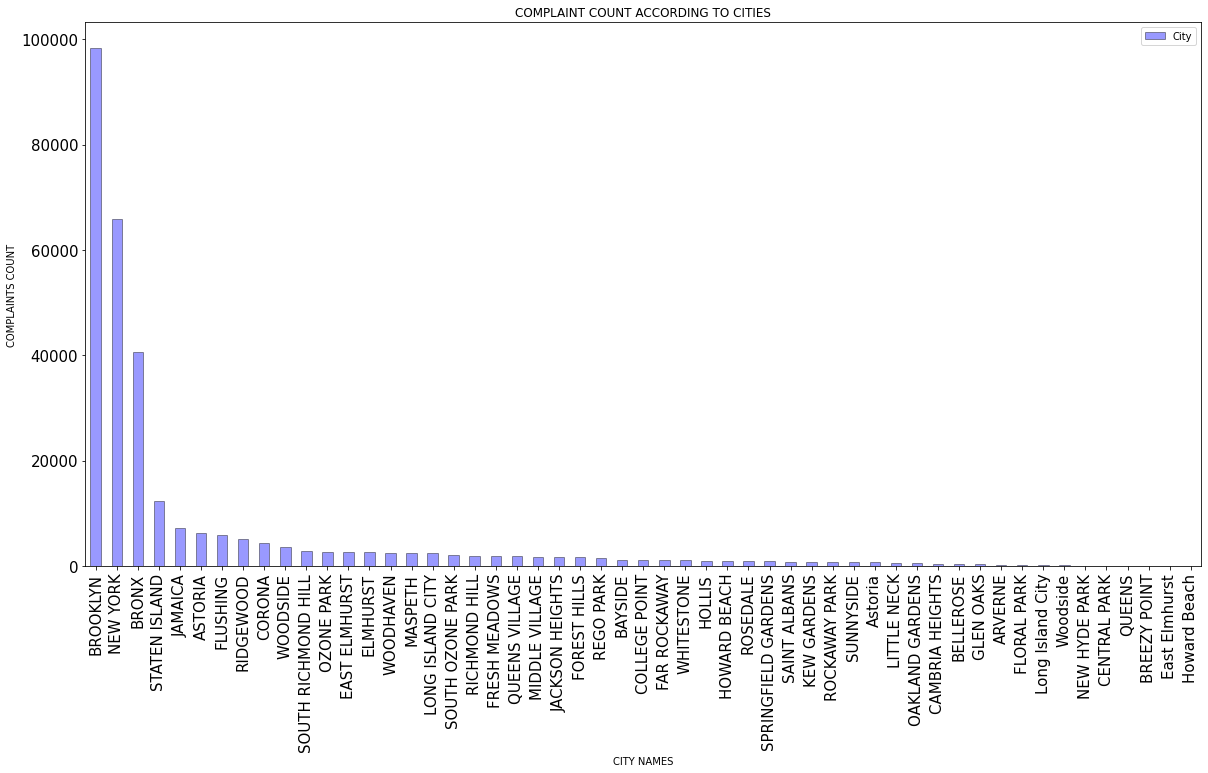

In [17]:

df_city.plot(kind='bar',
             figsize=(20,10),
             color = 'b',alpha =0.4,
             ec = 'k',
             fontsize=(15),
             xlabel=('CITY NAMES'),ylabel=('COMPLAINTS COUNT'),
             title=('COMPLAINT COUNT ACCORDING TO CITIES'))
plt.show()

#### Brooklyn has the highest number of complaints, followed by New York

### Bar graph by description of complaints

In [18]:
# Distribution of Complaints
descriptor = df_perfect['Descriptor'].value_counts()
descriptor

Loud Music/Party                  60829
No Access                         56822
Posted Parking Sign Violation     22274
Loud Talking                      21377
Partial Access                    19988
With License Plate                17588
Blocked Hydrant                   15898
Commercial Overnight Parking      11962
Car/Truck Music                   11227
Blocked Sidewalk                  10997
Double Parked Blocking Traffic     5636
Double Parked Blocking Vehicle     4208
Engine Idling                      4178
Banging/Pounding                   4110
Neglected                          3782
Car/Truck Horn                     3493
Congestion/Gridlock                2760
In Prohibited Area                 2024
Other (complaint details)          1967
Unlicensed                         1771
Overnight Commercial Storage       1756
Unauthorized Bus Layover           1340
Truck Route Violation              1013
In Public                           928
Tortured                            851


In [19]:
df_descriptor = pd.DataFrame(descriptor)

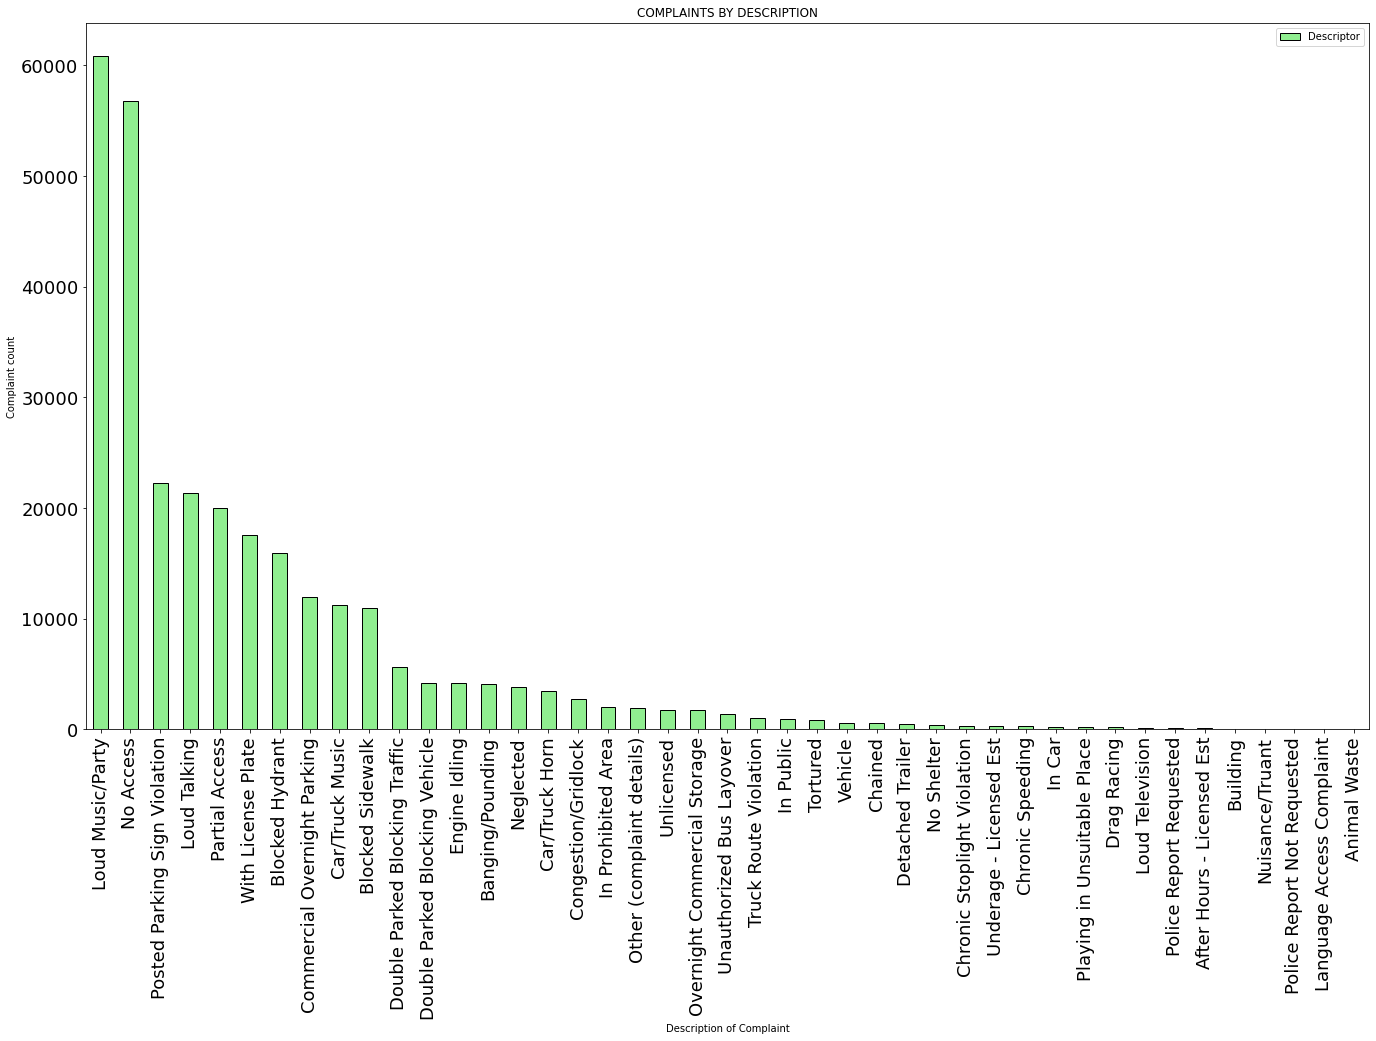

In [20]:
df_descriptor.plot(kind='bar',
                  xlabel=('Description of Complaint'),ylabel=('Complaint count')
                  ,title=('COMPLAINTS BY DESCRIPTION')
                  ,figsize=(23,13)
                  ,color='g',fc='lightgreen',ec='k'
                  ,fontsize=18)
plt.show()

### Most of the complaints were because of Loud Music/Party

In [21]:
# Finding out the complaint types which are the most
complaint_type = df_perfect['Complaint Type'].value_counts()
complaint_type

Blocked Driveway             76810
Illegal Parking              74532
Noise - Street/Sidewalk      48076
Noise - Commercial           35247
Derelict Vehicle             17588
Noise - Vehicle              17033
Animal Abuse                  7768
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4022
Vending                       3795
Drinking                      1275
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      424
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [22]:
complaint_df = df_perfect.groupby(['Complaint Type'])['Unique Key'].count()
complaint_df

Complaint Type
Agency Issues                    6
Animal Abuse                  7768
Animal in a Park                 1
Bike/Roller/Skate Chronic      424
Blocked Driveway             76810
Derelict Vehicle             17588
Disorderly Youth               286
Drinking                      1275
Graffiti                       113
Homeless Encampment           4416
Illegal Fireworks              168
Illegal Parking              74532
Noise - Commercial           35247
Noise - House of Worship       929
Noise - Park                  4022
Noise - Street/Sidewalk      48076
Noise - Vehicle              17033
Panhandling                    305
Posting Advertisement          648
Squeegee                         4
Traffic                       4496
Urinating in Public            592
Vending                       3795
Name: Unique Key, dtype: int64

In [23]:
# Here we reset index because the index first was complaint type which we want to be an axis
# The unique key as the name suggests is unique which is same for the same type of rows
complaint_count = pd.DataFrame(complaint_df).reset_index()
complaint_count

,Complaint Type,Unique Key
0,Agency Issues,6
1,Animal Abuse,7768
2,Animal in a Park,1
3,Bike/Roller/Skate Chronic,424
4,Blocked Driveway,76810
5,Derelict Vehicle,17588
6,Disorderly Youth,286
7,Drinking,1275
8,Graffiti,113
9,Homeless Encampment,4416


In [24]:
x = complaint_count['Complaint Type']
x.shape

(23,)

In [25]:
y = complaint_count['Unique Key']
y.shape

(23,)

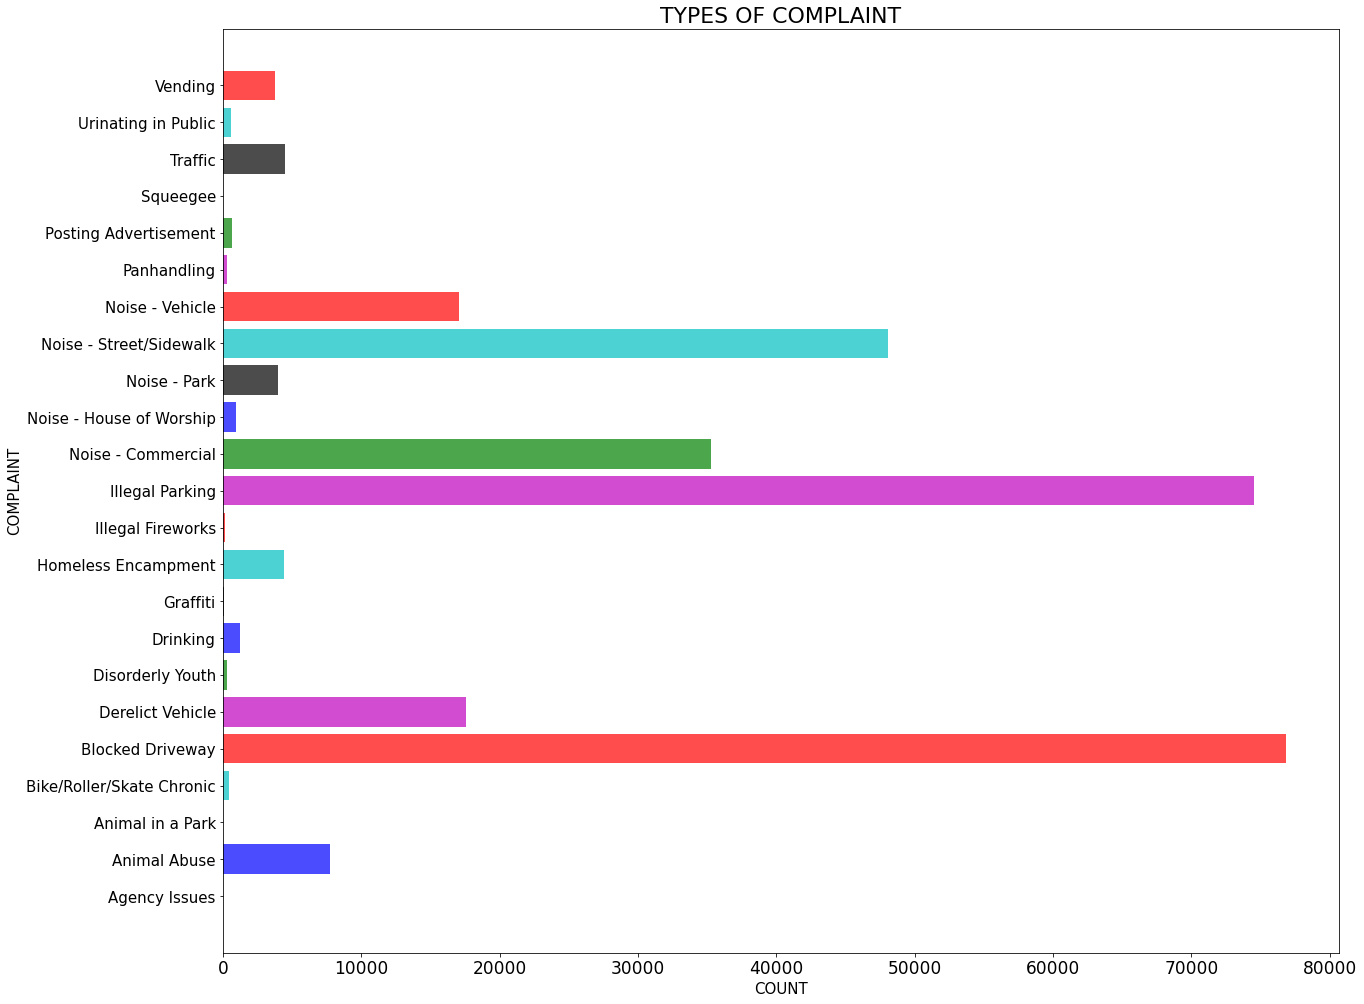

In [26]:
plt.figure(figsize=(20,17))
c = ['g','b','k','c','r','m']

plt.rc('ytick',labelsize=15) # Y ticks size
plt.rc('xtick',labelsize=17) # X ticks size
plt.barh(x,y,color=c,alpha=0.7)
plt.title('TYPES OF COMPLAINT',size=(22))
plt.xlabel('COUNT',size=(15))
plt.ylabel('COMPLAINT',size=(15))
plt.show()

### The highest number of complaint type were of blocked driveway, followed by illegal parking

In [27]:
loc_type = df_perfect['Location Type'].value_counts()
loc_type

Street/Sidewalk               247503
Store/Commercial               20183
Club/Bar/Restaurant            17227
Residential Building/House      6953
Park/Playground                 4751
House of Worship                 927
Residential Building             227
Highway                          214
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Park                               1
Name: Location Type, dtype: int64

In [28]:
df_loctype = pd.DataFrame(loc_type).reset_index()
df_loctype

,index,Location Type
0,Street/Sidewalk,247503
1,Store/Commercial,20183
2,Club/Bar/Restaurant,17227
3,Residential Building/House,6953
4,Park/Playground,4751
5,House of Worship,927
6,Residential Building,227
7,Highway,214
8,Parking Lot,117
9,House and Store,93


### Location types by complaints

In [29]:
x = df_loctype['index']
y = df_loctype['Location Type']

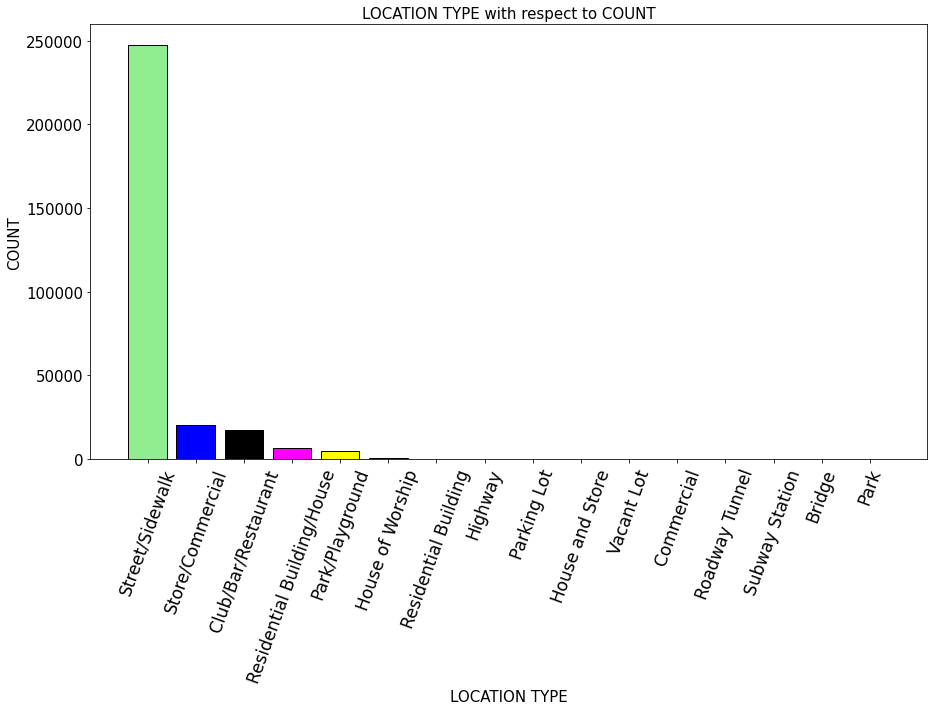

In [30]:
plt.figure(figsize=(15,8))
c = ['lightgreen','blue','black','magenta','yellow']

plt.xlabel('LOCATION TYPE',size=(15))
plt.ylabel('COUNT',size=(15))

plt.title('LOCATION TYPE with respect to COUNT',size=(15))

plt.rc('ytick',labelsize=15)
plt.rc('xtick',labelsize=12)
plt.xticks(rotation='70')
plt.bar(x,y,color=c,ec='k')
plt.show()

### Street/Sidewalk has the highest count

## COMPLAINT COUNT BY BOROUGH

In [31]:
borough = df_perfect['Borough'].value_counts()
borough

BROOKLYN         98295
QUEENS           80629
MANHATTAN        66109
BRONX            40697
STATEN ISLAND    12338
Unspecified        466
Name: Borough, dtype: int64

In [32]:
df_borough_n = borough.reset_index()
df_borough_n

,index,Borough
0,BROOKLYN,98295
1,QUEENS,80629
2,MANHATTAN,66109
3,BRONX,40697
4,STATEN ISLAND,12338
5,Unspecified,466


In [33]:
y = df_borough_n['Borough']
lbs = df_borough_n['index']


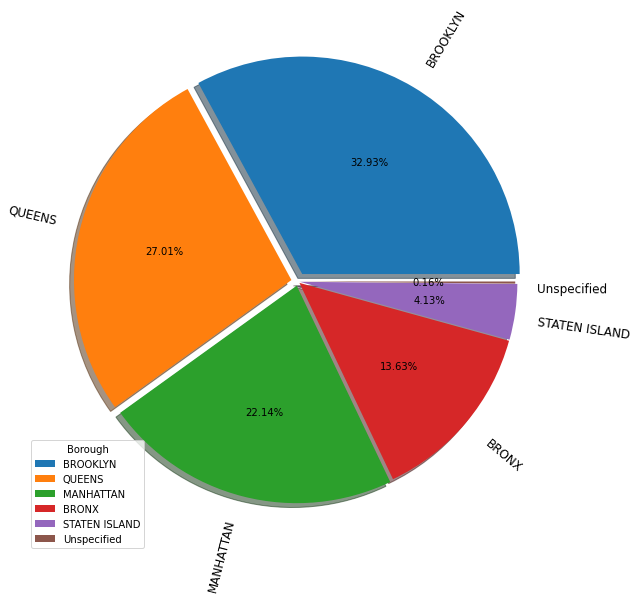

In [34]:
plt.figure(figsize=(10,10))
exp = [0.04,0.03,0.02,0.01,0.01,0.0]

plt.pie(y,labels=(lbs),autopct='%1.2f%%',explode=exp,rotatelabels=True,shadow=True)
plt.legend(title=('Borough'),loc='lower left')
plt.show()

### Brooklyn has highest number of complaint count followed by Queens then Manhattan

### Finding out the status of the complaints

In [35]:
status = pd.DataFrame(df_perfect.groupby(['Status'])['Unique Key'].count()).reset_index()
status

,Status,Unique Key
0,Assigned,26
1,Closed,298471
2,Draft,1
3,Open,36


In [36]:
x = status['Status']
y = status['Unique Key']

No handles with labels found to put in legend.


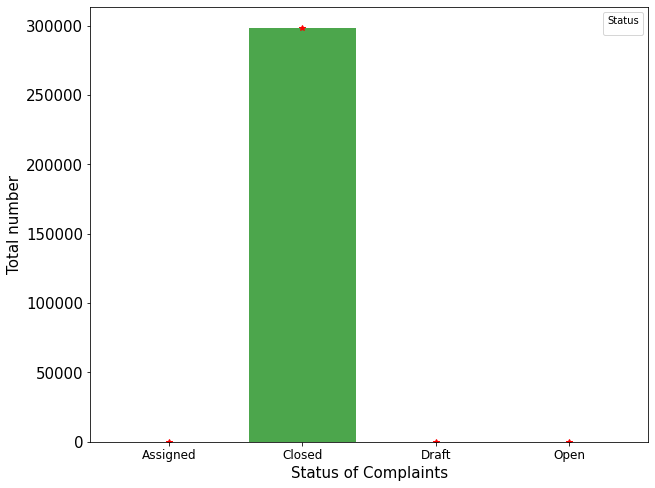

In [37]:
plt.figure(figsize=(10,8))
c = ['red','green','orange']

plt.plot(x,y,ls='',c='r',marker='*')
plt.bar(x,y,color=c,alpha=0.7)
plt.xlabel('Status of Complaints',size=15)
plt.ylabel('Total number',size=15)
plt.legend(title=('Status'))
plt.show()

### Mostly the compliants are resolved or closed and only a very limited are unresolved

## Average Request closing time for different location

In [38]:
def prepareData(df_prepare):
    df_perfect['Request_Closing_Time'] = (df_perfect['Closed Date'] - df_perfect['Created Date']).dt.days # Converting to days
    RCT_Clean=df_perfect[df_perfect['Request_Closing_Time'].notnull()] # getting values which are not null
    df_cleaned = RCT_Clean[RCT_Clean['Closed Date'] >= RCT_Clean['Created Date']]
    df_cleaned['Day of Week'] = df_cleaned['Created Date'].dt.dayofweek
    df_cleaned['Day of Month'] = df_cleaned['Created Date'].dt.day
    df_cleaned['Month'] = df_cleaned['Created Date'].dt.month
    df_cleaned['Year'] = df_cleaned['Created Date'].dt.year
    df_cleaned=df_cleaned[df_cleaned.Borough!='Unspecified']
    return df_cleaned

In [39]:
df_cleaned = prepareData(df_perfect)
df_cleaned.shape

(298068, 58)

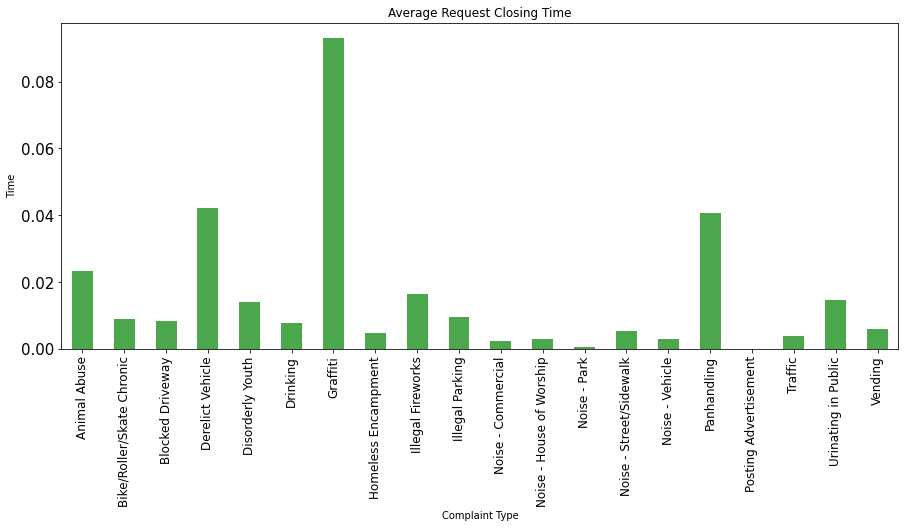

In [40]:
Brooklyn=df_perfect[(df_perfect['City']=='BROOKLYN')]
var = Brooklyn.groupby('Complaint Type').Request_Closing_Time.mean()
frequent = Brooklyn['Complaint Type'].value_counts()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint_Type')
ax1.set_ylabel('Time')
ax1.set_title("Average Request Closing Time")
var.plot(x='Complaint Type',y='Request_Closing_Time',kind='bar',figsize=(15,6),color = 'g',alpha=0.7)
plt.show()

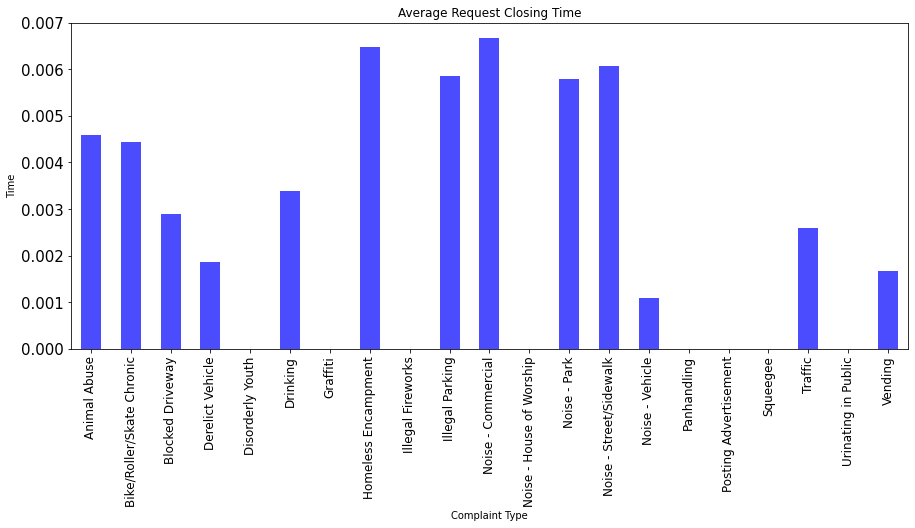

In [41]:
New_York=df_perfect[(df_perfect['City']=='NEW YORK')]
var = New_York.groupby('Complaint Type').Request_Closing_Time.mean()
frequent = New_York['Complaint Type'].value_counts()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint_Type')
ax1.set_ylabel('Time')
ax1.set_title("Average Request Closing Time")
var.plot(x='Complaint Type',y='Request_Closing_Time',kind='bar',figsize=(15,6),color = 'b',alpha=0.7)
plt.show()

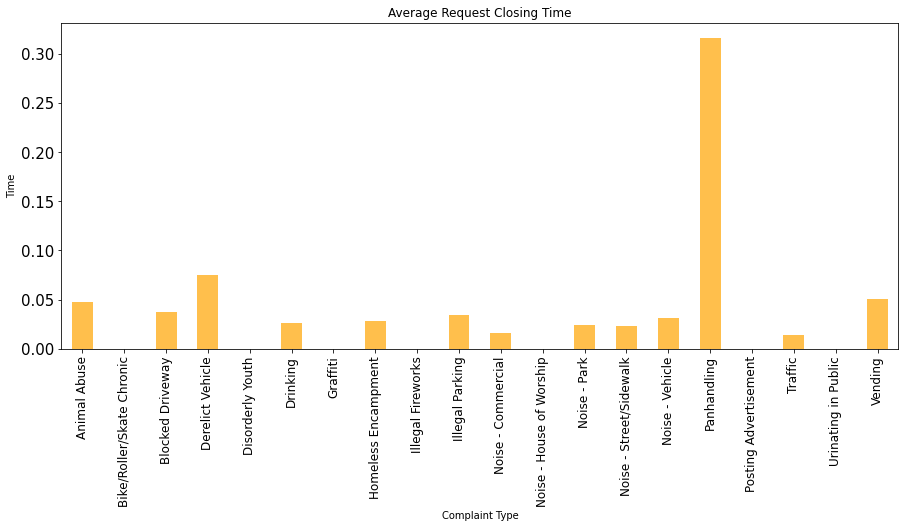

In [42]:
Bronx=df_perfect[(df_perfect['City']=='BRONX')]
var = Bronx.groupby('Complaint Type').Request_Closing_Time.mean()
frequent = Bronx['Complaint Type'].value_counts()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint_Type')
ax1.set_ylabel('Time')
ax1.set_title("Average Request Closing Time")
var.plot(x='Complaint Type',y='Request_Closing_Time',kind='bar',figsize=(15,6),color = 'orange',alpha=0.7)
plt.show()

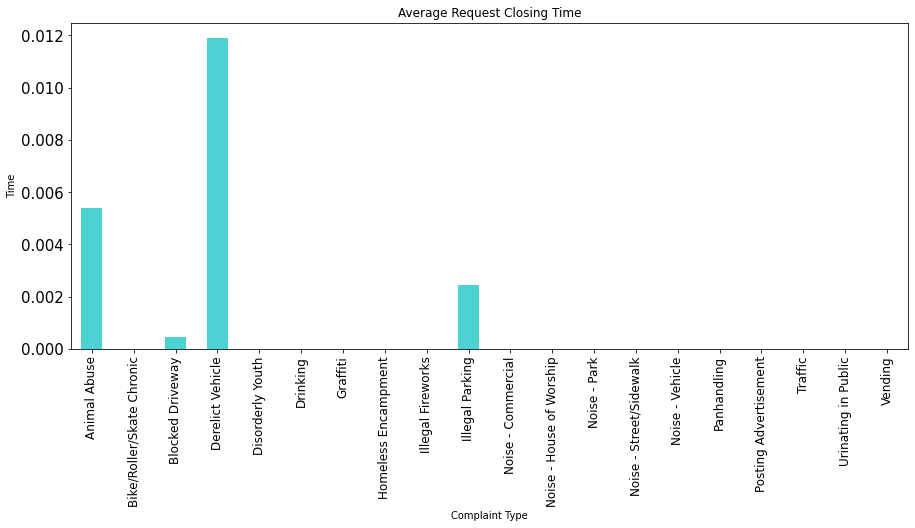

In [43]:
Staten_island=df_perfect[(df_perfect['City']=='STATEN ISLAND')]
var = Staten_island.groupby('Complaint Type').Request_Closing_Time.mean()
frequent = Staten_island['Complaint Type'].value_counts()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint_Type')
ax1.set_ylabel('Time')
ax1.set_title("Average Request Closing Time")
var.plot(x='Complaint Type',y='Request_Closing_Time',kind='bar',figsize=(15,6),color = 'c',alpha=0.7)
plt.show()

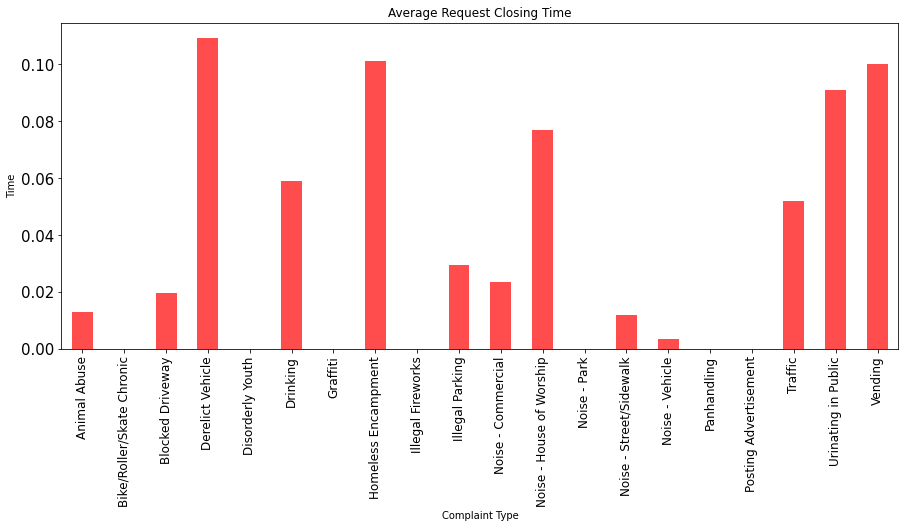

In [44]:
Jamaica=df_perfect[(df_perfect['City']=='JAMAICA')]
var = Jamaica.groupby('Complaint Type').Request_Closing_Time.mean()
frequent = Jamaica['Complaint Type'].value_counts()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint_Type')
ax1.set_ylabel('Time')
ax1.set_title("Average Request Closing Time")
var.plot(x='Complaint Type',y='Request_Closing_Time',kind='bar',figsize=(15,6),color = 'red',alpha =0.7)
plt.show()

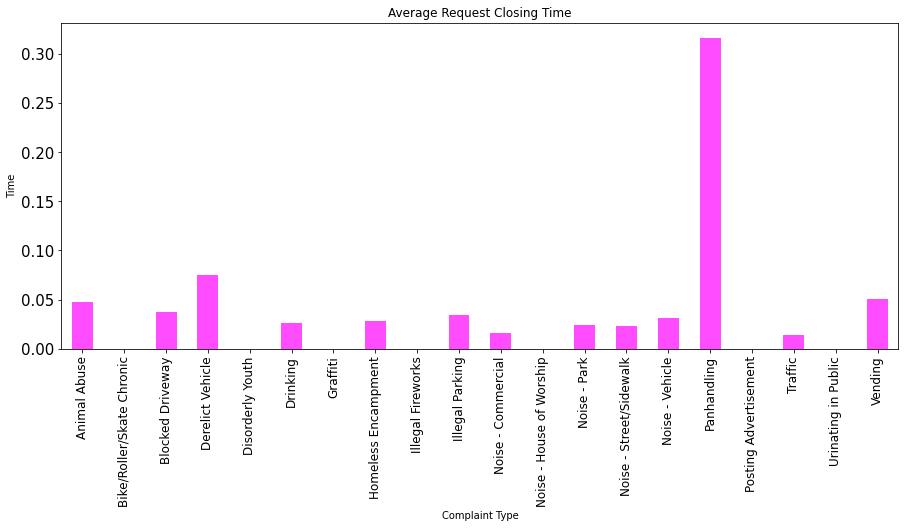

In [45]:
Astoria=df_perfect[(df_perfect['City']=='ASTORIA')]
var = Bronx.groupby('Complaint Type').Request_Closing_Time.mean()
frequent = Bronx['Complaint Type'].value_counts()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint_Type')
ax1.set_ylabel('Time')
ax1.set_title("Average Request Closing Time")
var.plot(x='Complaint Type',y='Request_Closing_Time',kind='bar',figsize=(15,6),color = 'magenta',alpha=0.7)
plt.show()

## Statistical Testing

### 1) Whether the average response time across complaint types is similar or not (overall)
### 1A) Null Hypothesis: Average response time across complaint types are similar
### 1B) Alternate Hypothesis: Average response time across complaint are not similar

In [46]:
from scipy.stats import f_oneway

In [47]:
unique_complaint_type = df_perfect['Complaint Type'].unique().tolist()

In [48]:
print(unique_complaint_type, end='')

['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Agency Issues', 'Squeegee', 'Animal in a Park']

In [49]:
from collections import defaultdict

In [50]:
complaint_type_dict = defaultdict(list)

In [51]:
for complaint, closing_time in df_perfect[['Complaint Type','Request_Closing_Time']].values:
    if complaint in unique_complaint_type:
        complaint_type_dict[complaint].append(closing_time)

In [52]:
len(complaint_type_dict) #same with the number of unique complaint types

23

In [53]:
complaint_type_array = np.array([array for key,array in complaint_type_dict.items()]) #converting each list to array
# or use np.append([],[array for key,array in complaint_type_dict.items()]) #converting each list to array

C:\Users\Dell\AppData\Local\Temp/ipykernel_7564/2542054.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  complaint_type_array = np.array([array for key,array in complaint_type_dict.items()]) #converting each list to array


In [54]:
noise_street_sidewlak = complaint_type_array[0]
blocked_driveway = complaint_type_array[1]
illegal_parking = complaint_type_array[2]
derelict_vehicle =complaint_type_array[3]
noise_commercial = complaint_type_array[4]
posting_advert = complaint_type_array[5]
noise_vehicle = complaint_type_array[6]
animal_abuse = complaint_type_array[7]
vending = complaint_type_array[8]
traffic = complaint_type_array[9]
drinking = complaint_type_array[10]
bike_roller_skate = complaint_type_array[11]
panhandling = complaint_type_array[12]
noise_park = complaint_type_array[13]
homeless_encamp = complaint_type_array[14]
urinate_pub = complaint_type_array[15]
graffiti = complaint_type_array[16]
disorder_youth = complaint_type_array[17]
illegal_fireworks = complaint_type_array[18]
agency_issues = complaint_type_array[19]
squeegee = complaint_type_array[20]
animal_park = complaint_type_array[21]

In [55]:
#One way ANOVA to test if the difference in means is statistically significant or not
F_statistic,p_val = \
f_oneway(noise_street_sidewlak,blocked_driveway,illegal_parking,derelict_vehicle,noise_commercial,\
         posting_advert,noise_vehicle,animal_abuse,vending,traffic,drinking,bike_roller_skate,panhandling,\
         noise_park,homeless_encamp,urinate_pub,graffiti,disorder_youth,illegal_fireworks,agency_issues,\
         squeegee,animal_park)

In [56]:
print('F-Statistic: {}, p-value:{}'.format(F_statistic,p_val))

F-Statistic: 99.98617528778269, p-value:0.0


 From the one way ANOVA test, the p-value is far less than the significance level so we will reject the null hypothesis and conclude that the mean request closing time across complaint types is different, overall

### 2) Are the type of complaint or service requested and location related?
### 2A) Null hypothesis : There is no relationship/association between location type and complaint type
### 2B) Alternative Hypothesis: There is a relationship/an association between location type and complaint type

In [57]:
from scipy.stats import chi2_contingency

In [58]:
contingency_table = pd.crosstab(df_perfect['Location Type'], df_perfect['Complaint Type'])

In [59]:
chisq_statistic, p_value, ddof, expected = chi2_contingency(contingency_table.values)

In [60]:
print('Chi square statistic: {}, p-value: {}'.format(chisq_statistic,p_value))

Chi square statistic: 1328207.9670820665, p-value: 0.0


From the chi square test results, we see that the p-value is less than the alpha or level of significance, hence we will reject our null hypothesis and conclude that there is a relationship between Location Type and Complaint Type